In [1]:
local_path='../final_project/'
file_name=local_path+'hail_oklahoma.csv'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
import scipy as sp
import datetime as dt

data=pd.read_csv(local_path+file_name)

The code above imports a csv file of all the hail reports in Oklahoma from 2010 to 2020. The information I'm grabbing from the file are dates of the reports, the hail size in inches in diameter, and number of reports of property damage. In addition, this code imports several packages that allow me to interpret and present the data I've gathered. I'll be using matplotlib to present graphs, numpy and pandas to retrieve and slice data, scipy to do statistical testing, and datetime to extract the year from each report.

In [2]:
data.columns
hailvalues=data['MAGNITUDE']
damage=data['DAMAGE_PROPERTY_NUM']
type(hailvalues)
hail=hailvalues.values
property_damage=damage.values
print(hail)
print(property_damage)
pd=np.where(property_damage<1,np.nan,property_damage)
print(pd)

[1.   1.   1.   ... 1.75 1.   1.  ]
[    0     0     0 ... 15000     0     0]
[   nan    nan    nan ... 15000.    nan    nan]


This code organizes the data into columns in pandas, and grabs two individual colums, the magnitude of the hail, and the number of properties damages. I check the type of the colunmn to make sure everything is right, and then extract the values. Next, I organize these columns into numpy arrays. For the array that includes the number of properties damaged, I replace all the reports of 0 damage with nan values, so that these don't clutter my data. 

In [3]:
date=data['BEGIN_DATE']
dates=date.values
print(dates)

xlist=[]
for year in dates:
    y=dt.datetime.strptime(year, '%m/%d/%Y')
    xlist.append(y.year)
    print(y)
s=np.array(xlist)
print(s)

['01/20/2010' '01/20/2010' '01/20/2010' ... '11/24/2020' '11/24/2020'
 '11/24/2020']
2010-01-20 00:00:00
2010-01-20 00:00:00
2010-01-20 00:00:00
2010-01-20 00:00:00
2010-01-20 00:00:00
2010-01-20 00:00:00
2010-03-08 00:00:00
2010-03-10 00:00:00
2010-03-10 00:00:00
2010-03-10 00:00:00
2010-03-10 00:00:00
2010-03-27 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-02 00:00:00
2010-04-04 00:00:00
2010-04-04 00:00:00
2010-04-04 00:00:00
2010-04-04 00:00:00
2010-04-04 00:00:00
2010-04-04 00:00:00
2010-04-04 00:00:00
2010-04-04 00:00:00
2010-04-05 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:00:00
2010-04-06 00:0

The code above is selecting the date column from the cvs file, and creating an array of those values. Next, in order to extract the year, I create an empty list, and then create a for-in loop. In the loop, I use datetime and the proper format of the dates in the column to append the empty list with each year in my csv file. Finally, I use numpy to make an array of these years, and I print them to make sure they're correct. 

[False False False ... False False False]
[]
[False False False ... False False False]
[]
[False False False ... False False False]
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 <a list of 10 Text major ticklabel objects>)

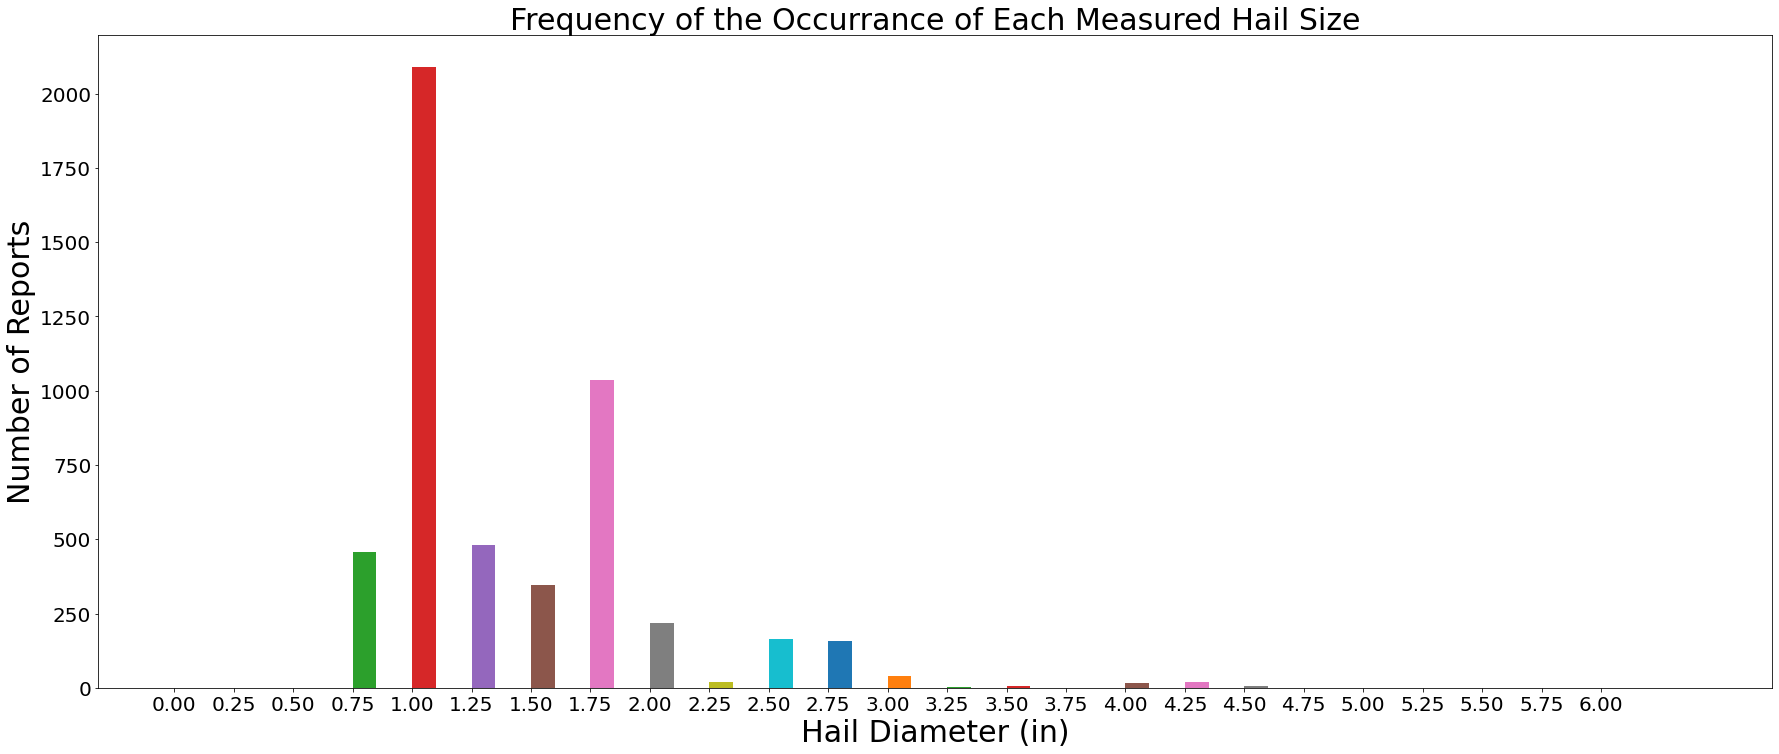

In [4]:
plt.figure(figsize=[30,12])
plt.title('Frequency of the Occurrance of Each Measured Hail Size',fontsize=30)
plt.xlabel('Hail Diameter (in)',fontsize=30)
plt.ylabel('Number of Reports',fontsize=30)

hail25=np.logical_and(hail==.25,pd) 
print(hail25)
True in hail25
hail_25=hail[hail25]
print(hail_25)
plt.hist(hail_25)

hail50=np.logical_and(hail==.5,pd) 
print(hail50)
True in hail50
hail_50=hail[hail50]
print(hail_50)
plt.hist(hail_50)

hail75=np.logical_and(hail==.75,pd) 
print(hail75)
True in hail75
hail_75=hail[hail75]
print(hail_75)
plt.hist(hail_75)

hail1=np.logical_and(hail==1,pd) 
print(hail1)
True in hail1
hail_1=hail[hail1]
print(hail_1)
plt.hist(hail_1)

hail125=np.logical_and(hail==1.25,pd) 
print(hail125)
True in hail125
hail_125=hail[hail125]
print(hail_125)
plt.hist(hail_125)

hail150=np.logical_and(hail==1.5,pd) 
print(hail150)
True in hail150
hail_150=hail[hail150]
print(hail_150)
plt.hist(hail_150)

hail175=np.logical_and(hail==1.75,pd) 
print(hail75)
True in hail175
hail_175=hail[hail175]
print(hail_175)
plt.hist(hail_175)

hail2=np.logical_and(hail==2,pd) 
print(hail2)
True in hail2
hail_2=hail[hail2]
print(hail_2)
plt.hist(hail_2)

hail225=np.logical_and(hail==2.25,pd) 
print(hail225)
True in hail225
hail_225=hail[hail225]
print(hail_225)
plt.hist(hail_225)

hail250=np.logical_and(hail==2.50,pd) 
print(hail250)
True in hail250
hail_250=hail[hail250]
print(hail_250)
plt.hist(hail_250)

hail275=np.logical_and(hail==2.75,pd) 
print(hail275)
True in hail275
hail_275=hail[hail275]
print(hail_275)
plt.hist(hail_275)

hail3=np.logical_and(hail==3,pd) 
print(hail3)
True in hail3
hail_3=hail[hail3]
print(hail_3)
plt.hist(hail_3)

hail325=np.logical_and(hail==3.25,pd) 
print(hail325)
True in hail325
hail_325=hail[hail325]
print(hail_325)
plt.hist(hail_325)

hail350=np.logical_and(hail==3.50,pd) 
print(hail350)
True in hail350
hail_350=hail[hail350]
print(hail_350)
plt.hist(hail_350)

hail375=np.logical_and(hail==3.75,pd) 
print(hail375)
True in hail375
hail_375=hail[hail375]
print(hail_375)
plt.hist(hail_375)

hail4=np.logical_and(hail==4,pd) 
print(hail4)
True in hail4
hail_4=hail[hail4]
print(hail_4)
plt.hist(hail_4)

hail425=np.logical_and(hail==4.25,pd) 
print(hail425)
True in hail425
hail_425=hail[hail425]
print(hail_425)
plt.hist(hail_425)

hail450=np.logical_and(hail==4.5,pd) 
print(hail450)
True in hail450
hail_450=hail[hail450]
print(hail_450)
plt.hist(hail_450)

hail475=np.logical_and(hail==4.75,pd) # only one value 4.75
print(hail475)
True in hail475
hail_475=hail[hail475]
print(hail_475)
plt.hist(hail_475)

hail5=np.logical_and(hail==5,pd) # only one value 5.0
print(hail5)
True in hail5
hail_5=hail[hail5]
print(hail_5)
plt.hist(hail_5)

hailover5=np.logical_and(hail>5.0,pd) # only one value 5.9
print(hailover5)
True in hail4
hail_over5=hail[hailover5]
print(hail_over5)
plt.hist(hail_over5)

plt.xticks(fontsize=20)
plt.xticks(np.arange(0, 6.25, step=0.25))
plt.yticks(fontsize=20)

For this section of code, I wanted to create a histogram of the frequency of hail sizes every .25 inches in diameter. To do so, I first used the np.logical_and function and set a variable equal to this. For example, I used the variable hail1 and set it equal to an np.logical_and function for hail that was equal to 1 inch in diameter. I then printed that array, which prints all the places where the boolean expression is true. Next, I use indexing and find all the places in the hail array where that boolean expression is true. Next, I add that variable to the histogram. I repeated this process from .25 inches to greater than 5 inches. Finally, I worked with matplotlib to amend the ticks on the x axis in order to show every .25 inches. From this, I drew the conclusiom that the most frequent hail sizes are between .75 and 1.75 inches in diameter, which I used to create a graph showing the most frequent hail sizes vs property damage. 

In [5]:
print("the mean hail size is " + str(np.mean(hail))+ " in in diameter")
print("the standard deviation of hail sizes is " + str(np.std(hail))+ " in in diameter")
print("the mean number of property damage reports is " + str(np.mean(property_damage)))
print("the standard deviation of property damage reports is " + str(np.std(property_damage)))
m=np.mean(hail)
sd=np.std(hail)

n=np.size(hail)
se=sd/np.sqrt(n)
df=n-1
q1=t.ppf(0.025,df)
q2=t.ppf(0.975,df)
ci1=m+se*q1
ci2=m+se*q2
print ("q1, q2 = %6.3f %6.3f" %(q1, q2))
print ("The mean and the 95 percent confidence range is: m, lower, upper CI: %6.3f %6.3f %6.3f" % (m,ci1,ci2))

the mean hail size is 1.3543987741121328 in in diameter
the standard deviation of hail sizes is 0.5883490313082594 in in diameter
the mean number of property damage reports is 83946.60176672075
the standard deviation of property damage reports is 3970944.0056688157
q1, q2 = -1.960  1.960
The mean and the 95 percent confidence range is: m, lower, upper CI:  1.354  1.339  1.370


The above code finds the mean hail size across all 11 years in Oklahoma and the standard deviation. It also finds the mean property damage report number across the same time and space and the standard deviation. Next, I find the size of the hail data set, which is important in determining confidence intervals. The standard error is determined by dividing the standard deviation by the square root of the sample size, and the degrees of freedom are calculated by subtracting one from the sample size. The two quantile values are calculated using the t.ppf functions, for the .025 and the .975 percentiles are calculated next. The lower and upper confidence intervals are then calculated by adding the mean to the standard error by the quantile values. 

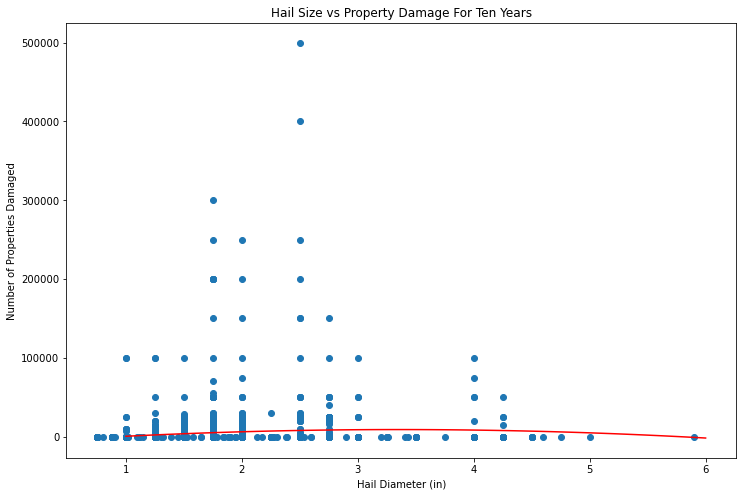

4469.665937027838 -3772.873577609445 0.16823795670646755 1.696137976477616e-36 351.6944460901677
[[1.         0.16823796]
 [0.16823796 1.        ]]
the correlation coefficient is .17
the slope is 4469.665937027838
the intercept is -3772.873577609445
the p_value is 1.696137976477616e-36
the standard error is 351.6944460901677


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

pd_adjusted=np.where(property_damage>=1000000,0,property_damage) 

plt.figure(figsize=(12,8))
curve=np.polyfit(hail,pd_adjusted, 2)
poly=np.poly1d(curve)
x1_help=np.linspace(1,6,100)
y1_help=poly(x1_help)
plt.plot(x1_help, y1_help, color='red')




plt.scatter(hail,pd_adjusted)
plt.title("Hail Size vs Property Damage For Ten Years")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(hail,pd_adjusted)
print(slope, intercept, r_value, p_value, std_err)

cc=np.corrcoef(hail,pd_adjusted)
print(cc)
print("the correlation coefficient is .17")
print("the slope is " + str(slope))
print("the intercept is " + str(intercept))
print("the p_value is " + str(p_value))
print("the standard error is " + str(std_err))

The above code creates a graph of all the hail reports and property damage reports across the 11 years of my data. I had to first clean the data, eliminating the outlier values of over 1,000,000 reports of property damage in order to make the graph more readable and most likely more accurate. This graph is showing that the hail diameters corresponding to the most property damage converges around 2.5 inches. Due to the shape of this data, I chose to use a quadratic regression trendline instead of a linear one, to accurately represent the way that property damage increases until a certain hail size threshold, and diminishes above it. I used np.polyfit of degree 2 to create the curve function, and np.poly1d to set it. Then, I used np.linspace to define the space on the graph that the regression curve would span. Finally, I used matplotlib to plot the quadratic regression trendline. The hypothesis that this leads me to is that even though larger hail is most likely to cause more property damage, that hail is much less frequent. The hail sizes that occur most often are going to be more likely to lead to more property damage simply because they occur more often. I then print the correlation coefficient which was .17. This is a bad value, but it is due to the fact that the data is so noisy. Finally, I print the slope, intercept, p_value, standard error. 

[False False False ... False False False]
[4.25 4.75 4.   4.6  4.25 4.25 4.25 3.   3.25 3.5  3.   3.   4.25 4.25
 4.25 4.   4.25 4.25 4.25 4.25 3.   4.5  4.25 3.   4.5  4.5  4.   4.
 4.   4.   3.   4.   4.5  4.25 4.25 4.   3.5  3.   3.   3.   3.   3.
 4.25 3.   4.5  5.   3.   4.   4.25 3.   3.   3.   3.   3.   3.25 4.25
 4.25 4.   5.9  3.   3.   4.25 3.   3.   4.   3.   3.   3.5  3.43 4.
 4.   3.   3.   3.25 4.25 3.5  3.5  4.   4.   3.   4.25 4.   3.   3.
 3.   3.   3.26 3.   3.2  3.   3.   3.   3.   3.75 3.25 3.   3.41 3.
 3.5  3.   3.   3.   4.  ]
[     0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0. 100000.      0.      0.      0.      0.      0.  75000.
  50000. 100000.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.     nan      0.      0.      0.      0.  25000.      0.      0.
      

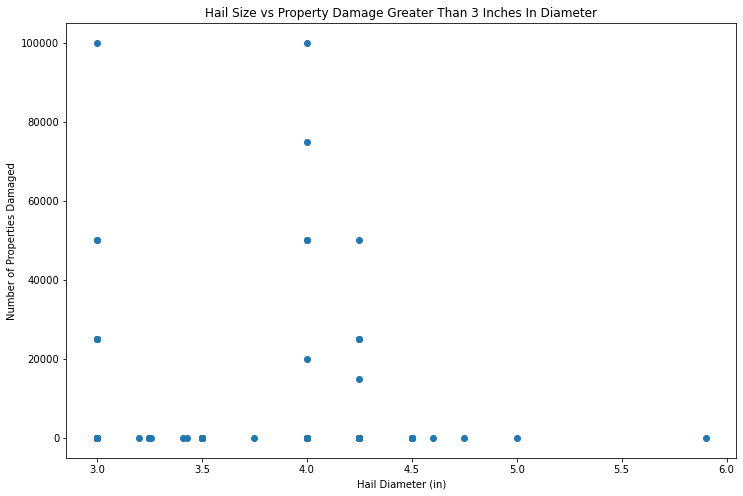

In [7]:
x=hail>2.99
print(x)
hail_over_3=(hail[x])
print(hail_over_3)

damage_over_3=property_damage[x]
damage_over_3=np.where(damage_over_3>100000000,np.nan,damage_over_3)
print(damage_over_3)


plt.figure(figsize=[12,8])
plt.plot(hail_over_3,damage_over_3,'o')
plt.title("Hail Size vs Property Damage Greater Than 3 Inches In Diameter")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.show()      

For this section of code, I decided to graph a scatter plot of hail diamters that were greater than 3 inches. To start, I used a boolean expression to determine where in a new variable x I could find hail values greater than 2.99 inches in diameter. Next, I created a new variable, hail_over_3, and used indexing to take all values in hail where the above boolean expression was true. I printed those values to check. Originally, my y-axis was difficult to interpret, because I had an outlier value, of property damage reports of 100000000. I used the np.where numpy function to replace this with a nan value, to make my data easier to view and eliminate a possible dummy value. Next, I used matplotlib to graph this plot. The values are very scattered around the plot, and I believe the reason for this is due to my earlier conclusion, that these sizes of hail don't occur very often, so they have less opportunity to damage more property. 

[ True  True  True ...  True  True  True]
[1.   1.   1.   ... 1.75 1.   1.  ]
----------------------------------------
The most frequent hail sizes were between .75 and 1.75 inches in diameter.
----------------------------------------
[    0     0     0 ... 15000     0     0]


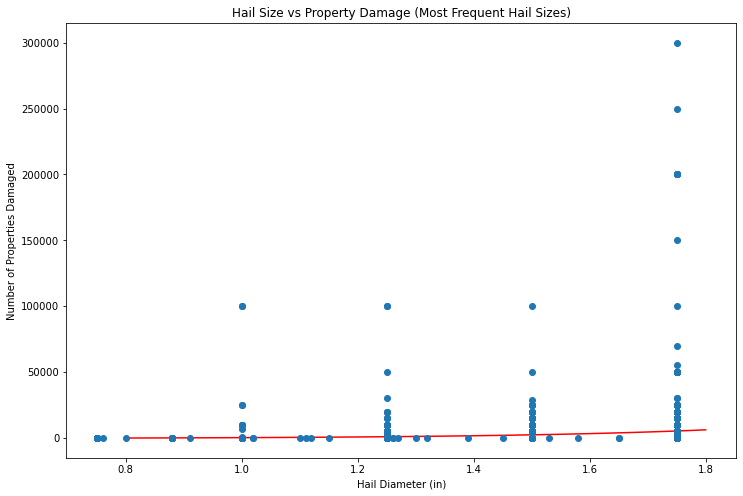

5829.457367006834 -5442.02280185751 0.1904819859303184 5.407133205321454e-41 430.7323303544452
[[1.         0.19048199]
 [0.19048199 1.        ]]
the correlation coefficient is .19
the slope is 5829.457367006834
the intercept is -5442.02280185751
the p_value is 5.407133205321454e-41
the standard error is 430.7323303544452


In [8]:
y=np.logical_and(hail>.74, hail<1.76)
print(y)
hail_frequent=(hail[y])
print(hail_frequent)
print(40*'-')
print("The most frequent hail sizes were between .75 and 1.75 inches in diameter.")
print(40*'-')

damage_frequent=property_damage[y]
print(damage_frequent)





from scipy.optimize import curve_fit
%matplotlib inline
def func(hail_frequent,a,b,c,d):
    return (a*(b**(c*hail_frequent)))+d
popt,pcov=curve_fit(func, hail_frequent, damage_frequent)
a,b,c,d=popt
x_help=np.linspace(.8,1.8,100)
plt.figure(figsize=[12,8])
plt.plot(x_help, func(x_help,a,b,c,d),'r-')
plt.plot(hail_frequent,damage_frequent,'o')
plt.title("Hail Size vs Property Damage (Most Frequent Hail Sizes)")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.show()




slope, intercept, r_value, p_value, std_err = stats.linregress(hail_frequent,damage_frequent)
print(slope, intercept, r_value, p_value, std_err)




cc1=np.corrcoef(hail_frequent,damage_frequent)
print(cc1)
print("the correlation coefficient is .19")
print("the slope is " + str(slope))
print("the intercept is " + str(intercept))
print("the p_value is " + str(p_value))
print("the standard error is " + str(std_err))


For this graph, I wanted to plot the most frequent hail sizes versus property damage. I used the np.logical_and function and to find all the hail reports that were between .75 and 1.75 inches in diameter. These values were chosen from the histogram below as the most frequent hail sizes. I used indexing to select those values and put them into an array. I matched these values to their corresponding property damage reports, and used matplotlib to plot them in a scatter plot. In addition, I added an exponential regression trend line because I felt that a linear regression didn't acurately represent the fact that as hail size increased, there were dramatic increases in the maximum property damage for that hail size, even though these events were less frequent. In order to do this, I defined a function that produced an exponential regression. I used the numpy linspace function to define the space across which the trendline would be implemented on the graph. I then used matplotlib to add this to my graph. There is clearly a trend among the most frequent hail sizes, leading me to hypothesize that among the most frequent hail sizes, as the magnitude of the hail increases, so to will the amount of property damage.  most often are going to be more likely to lead to more property damage simply because they occur more often. I then print the correlation coefficient which was .19. This is a bad value, but it is due to the fact that the data is so noisy. Finally, I print the slope, intercept, p_value, standard error. 

In [9]:
print(s)

s2010=s==2010
a1=np.mean(hail[s2010])
b1=np.mean(property_damage[s2010])

s2011=s==2011
a2=np.mean(hail[s2011])
b2=np.mean(property_damage[s2011])

s2012=s==2012
a3=np.mean(hail[s2012])
b3=np.mean(property_damage[s2012])

s2013=s==2013
a4=np.mean(hail[s2013])
b4=np.mean(property_damage[s2013])

s2014=s==2014
a5=np.mean(hail[s2014])
b5=np.mean(property_damage[s2014])

s2015=s==2015
a6=np.mean(hail[s2015])
b6=np.mean(property_damage[s2015])

s2016=s==2016
a7=np.mean(hail[s2016])
b7=np.mean(property_damage[s2016])

s2017=s==2017
a8=np.mean(hail[s2017])
b8=np.mean(property_damage[s2017])

s2018=s==2018
a9=np.mean(hail[s2018])
b9=np.mean(property_damage[s2018])

s2019=s==2019
a10=np.mean(hail[s2019])
b10=np.mean(property_damage[s2019])

s2020=s==2020
a11=np.mean(hail[s2020])
b11=np.mean(property_damage[s2020])

[2010 2010 2010 ... 2020 2020 2020]


The above code allowes me to create the graphs underneath, where I graph the number of reports of property damage for each hail size in a given year. For example, in lines 3-5, I use a boolean expression to set a variable equal to an array of which values occur in 2010. I repeat this for each year. Then, in the graphs below, I create bar plots of my hail and property damage arrays using the indices where for those values in a given year. I repeat this for every year as well, so that I have 11 bar graphs. In the above code as well, I set variables equal to the mean hail size and mean property damage for each year, which I will use below the bar graphs. 

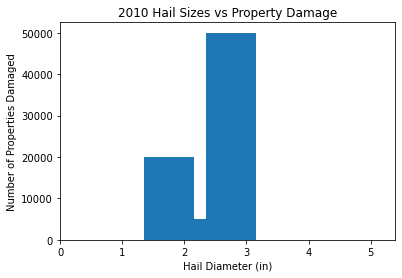

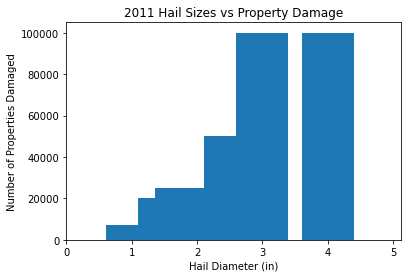

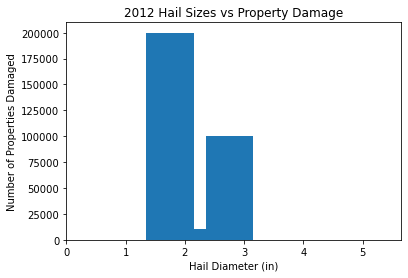

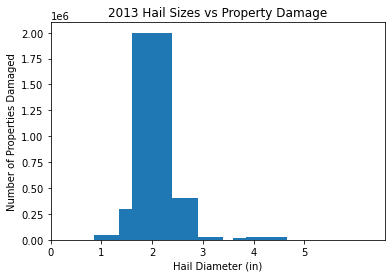

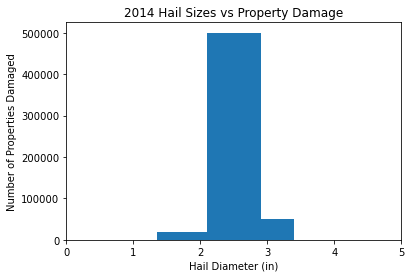

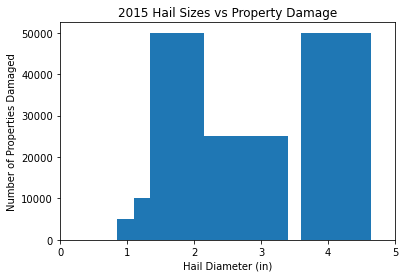

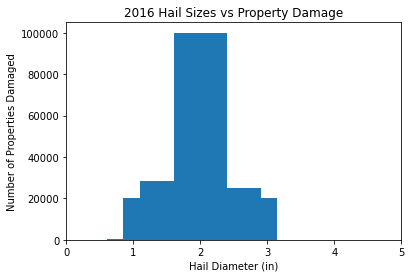

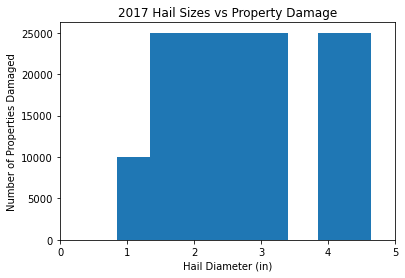

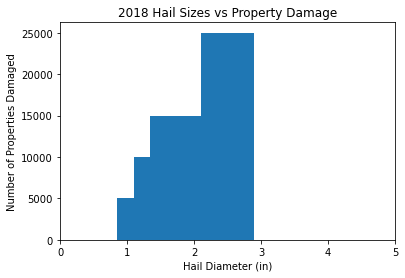

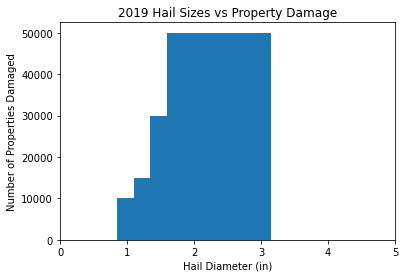

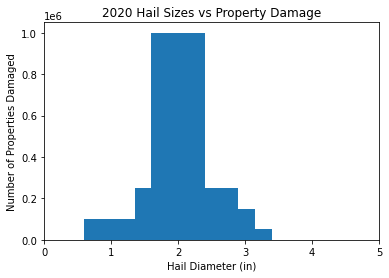

In [24]:
plt.bar(hail[s2010],property_damage[s2010])
plt.title("2010 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

plt.bar(hail[s2011],property_damage[s2011])
plt.title("2011 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()




pd2012=property_damage[s2012]
pd2012check=pd2012<250000000

pd2012corrected=np.where(pd2012>10000000,np.nan,pd2012)
plt.bar(hail[s2012],pd2012corrected)
plt.title("2012 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()




plt.bar(hail[s2013],property_damage[s2013])
plt.title("2013 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

plt.bar(hail[s2014],property_damage[s2014])
plt.title("2014 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

plt.bar(hail[s2015],property_damage[s2015])
plt.title("2015 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

plt.bar(hail[s2016],property_damage[s2016])
plt.title("2016 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

plt.bar(hail[s2017],property_damage[s2017])
plt.title("2017 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

plt.bar(hail[s2018],property_damage[s2018])
plt.title("2018 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

plt.bar(hail[s2019],property_damage[s2019])
plt.title("2019 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

plt.bar(hail[s2020],property_damage[s2020])
plt.title("2020 Hail Sizes vs Property Damage")
plt.xlabel("Hail Diameter (in)")
plt.ylabel("Number of Properties Damaged")
plt.xticks(np.arange(0, 6, step=1))
plt.show()

Each bar graph uses the pyplot function of matplotlib to present the data that is explained above. Looking at each year, the same trend of the greatest property damage converging around the most frequent hail sizes. 

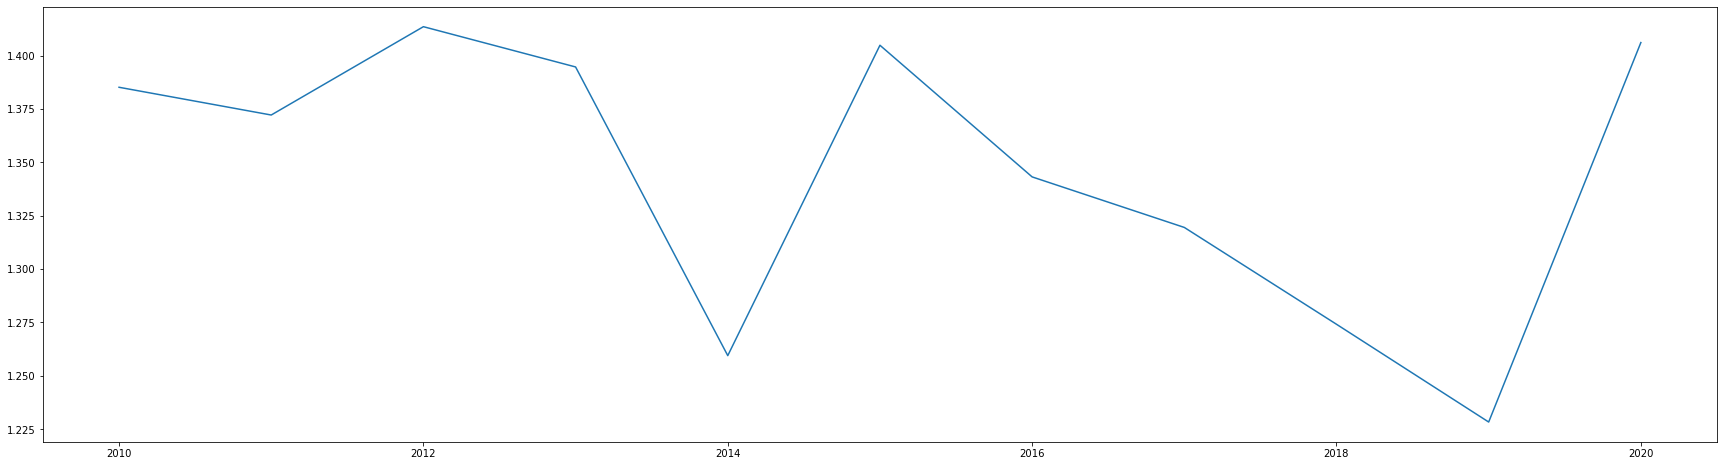

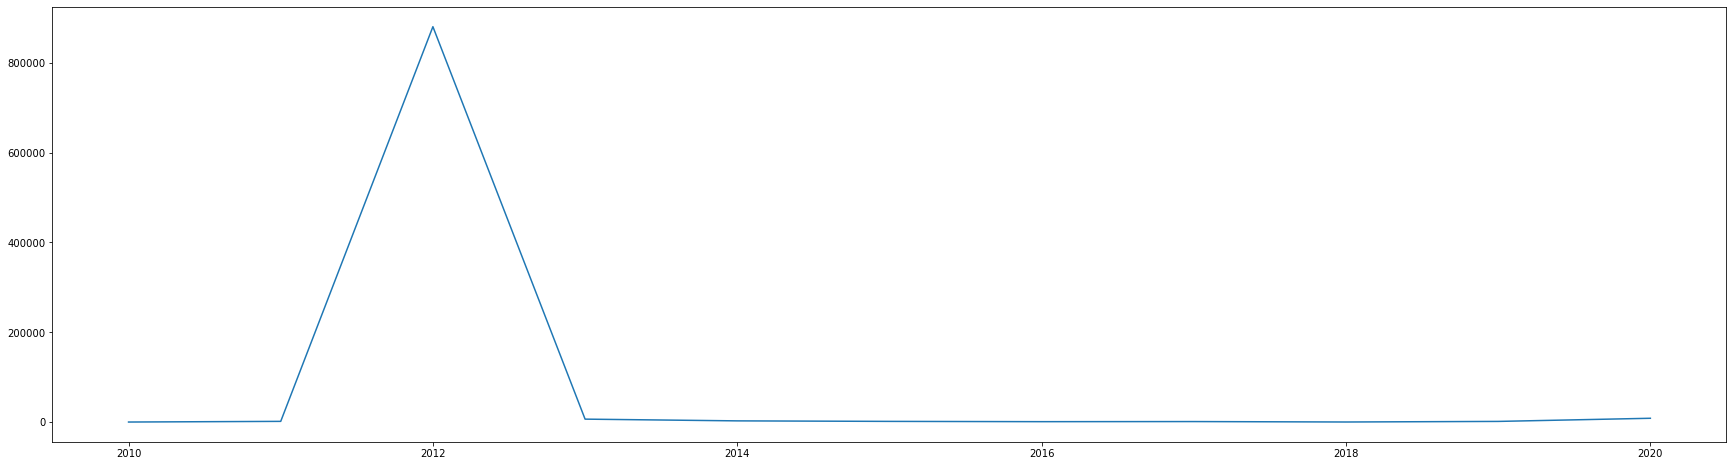

[1.38512626 1.37213497 1.41349609 1.39463816 1.2594717  1.40480412
 1.34315668 1.31949367 1.27414966 1.22837067 1.40606504]
[3.16161616e+02 1.79631902e+03 8.80274414e+05 6.76233553e+03
 2.90566038e+03 1.75257732e+03 1.11543779e+03 1.35126582e+03
 3.91156463e+02 1.69551935e+03 8.69105691e+03]
----------------------------------------
 the p-value is: 0.32571922256931485
1390241.793070339 -1788162.5114107225 0.3460929798322749 0.29713732744143 1256237.7063650778


In [12]:
yearly_mean_hail=np.array([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11])
yearly_mean_damage=np.array([b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11])
each_year=np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

plt.figure(figsize=[30,8])
plt.plot(each_year,yearly_mean_hail)
plt.show()

plt.figure(figsize=[30,8])
plt.plot(each_year,yearly_mean_damage)
plt.show()

print(yearly_mean_hail)
print(yearly_mean_damage)
print(40*'-')
tvalue, pvalue=stats.ttest_ind(yearly_mean_hail,yearly_mean_damage,equal_var=False,nan_policy='omit')

print(" the p-value is: " + str(pvalue))






slope, intercept, r_value, p_value, std_err = stats.linregress(yearly_mean_hail,yearly_mean_damage)
print(slope, intercept, r_value, p_value, std_err)

This code creates two arrays, one taking the mean values of hail sizes from the previous section of code for each year, and one doing the same for property damage. I make a third array, of each year from 2010 to 2020. Then, I used matplotlib to graph mean hail for each year, and mean property damage for each year. Bewlow that, I print the values in each array. Next, I use scipy to obtain the t-value and the p-value for mean hail vs mean property damage, and I print that below the graphs. I expected these graphs to show something close to a horizontal line, as the mean values of property damage and hail size were not expected to increase across the 11 year period. The ups and downs in the data most likely represent the effect of outlier hail size and outlier amounts of property damage throughout the years. 

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

array([        0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,     15000,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0,         0,         0,
               0,         0,         0,         0, 